#                                      Spooky Author Identification


![Drag Racing|20x20](spooky1.jpg)





The competition dataset contains text from works of fiction written by spooky authors of the public domain: Edgar Allan Poe, HP Lovecraft and Mary Shelley. The data was prepared by chunking larger texts into sentences using CoreNLP's MaxEnt sentence tokenizer, so you may notice the odd non-sentence here and there. Your objective is to accurately identify the author of the sentences in the test set.

#### File descriptions
1. train.csv - the training set
2. test.csv - the test set
3. sample_submission.csv - a sample submission file in the correct format  

#### Data fields  
1. id - a unique identifier for each sentence
2. text - some text written by one of the authors
3. author - the author of the sentence (EAP: Edgar Allan Poe, HPL: HP Lovecraft; MWS: Mary Wollstonecraft Shelley)

#### The outline of this notebook is as follows:

1. Exploratory Data Analysis (EDA) and Wordclouds - Analyzing the data by generating simple statistics such word frequencies over the different authors as well as plotting some wordclouds (with image masks).


2. Natural Language Processing (NLP) with NLTK (Natural Language Toolkit) - Introducing basic text processing methods such as tokenizations, stop word removal, stemming and vectorizing text via term frequencies (TF) as well as the inverse document frequencies (TF-IDF)


3. Topic Modelling with LDA and NNMF - Implementing the two topic modelling techniques of Latent Dirichlet Allocation (LDA) and Non-negative Matrix Factorization (NMF).

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import random

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL



*According to the competition page there are three distinct author initials we have already been provided with a mapping of these initials to the actual author which is as follows:*


> EAP - Edgar Allen Poe : American writer who wrote poetry and short stories that revolved around tales of mystery and the grisly and the grim. Arguably his most famous work is the poem - "The Raven" and he is also widely considered the pioneer of the genre of the detective fiction.

> HPL - HP Lovecraft : Best known for authoring works of horror fiction, the stories that he is most celebrated for revolve around the fictional mythology of the infamous creature "Cthulhu" - a hybrid chimera mix of Octopus head and humanoid body with wings on the back.

> MWS - Mary Shelley : Seemed to have been involved in a whole panoply of literary pursuits - novelist, dramatist, travel-writer, biographer. She is most celebrated for the classic tale of Frankenstein where the scientist Frankenstein a.k.a "The Modern Prometheus" creates the Monster that comes to be associated with his name.

Next, let us take a look at how large the training data is:

In [4]:
df.shape

(19579, 3)

In [5]:
df.author.value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

In [6]:
df.isnull().sum()

id        0
text      0
author    0
dtype: int64

### WordClouds to visualise each author's work

One very handy visualization tool for a data scientist when it comes to any sort of natural language processing is plotting "Word Cloud". A word cloud (as the name suggests) is an image that is made up of a mixture of distinct words which may make up a text or book and where the size of each word is proportional to its word frequency in that text (number of times the word appears). Here instead of dealing with an actual book or text, our words can simply be taken from the column "text"

Store the text of each author in a Python list

We first create three different python lists that store the texts of Edgar Allen Poe, HP Lovecraft and Mary Shelley respectively as follows:

In [14]:
eap = df[df.author=="EAP"]["text"].values
hpl = df[df.author=="HPL"]["text"].values
mws = df[df.author=="MWS"]["text"].values

In [15]:
eap

array(['This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.',
       'In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.',
       'The astronomer, perhaps, at this point, took refuge in the suggestion of non luminosity; and here analogy was suddenly let fall.',
       ..., 'The lids clenched themselves together as if in a spasm.',
       'Mais il faut agir that is to say, a Frenchman never faints outright.',
       'For an item of news like this, it strikes us it was very coolly received."'],
      dtype=object)

In [16]:
from wordcloud import WordCloud, STOPWORDS

In [27]:
from PIL import Image

In [32]:
horse_mask = np.array(Image.open("horse.jpg"))

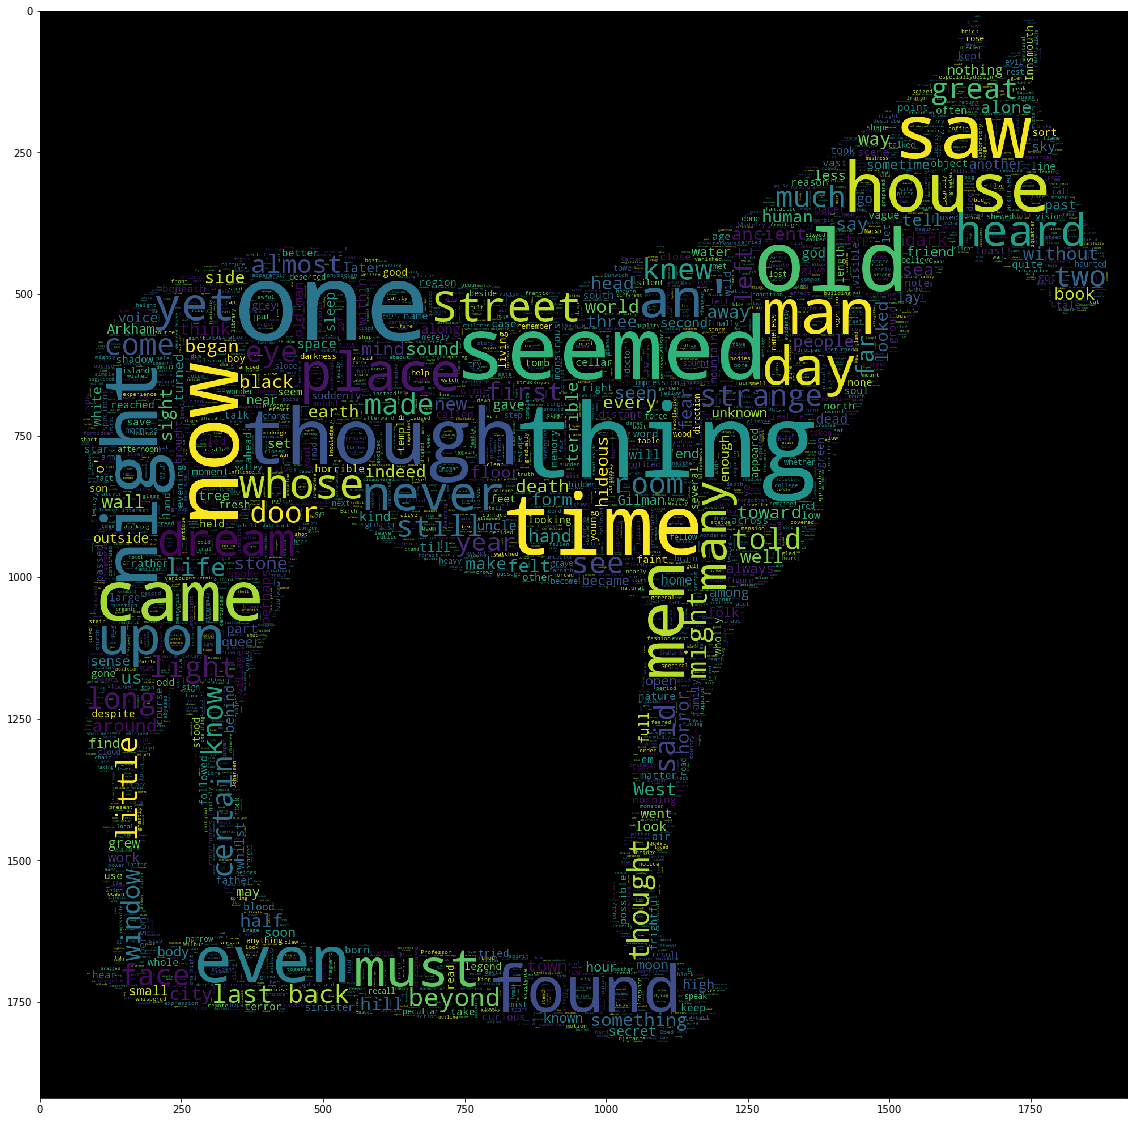

In [34]:
wc=WordCloud(max_words=10000,stopwords=STOPWORDS,mask=horse_mask).generate(' '.join(hpl))
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.show()

In [36]:
pheonix_mask=np.array(Image.open("pheonix.jpg"))



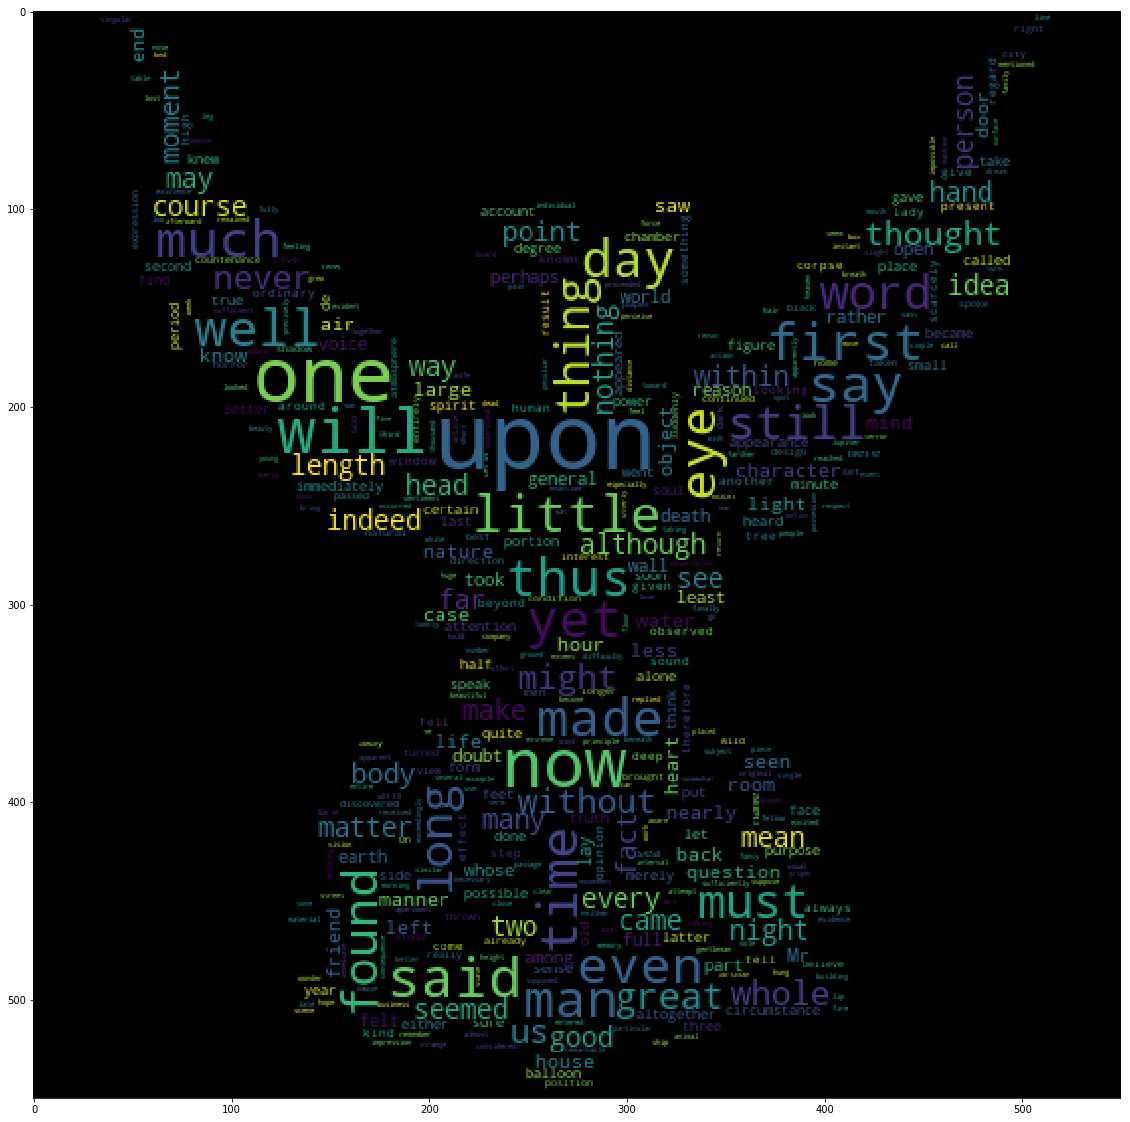

In [39]:
wc=WordCloud(max_words=10000,stopwords=STOPWORDS,mask=pheonix_mask).generate(' '.join(eap))
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.show()

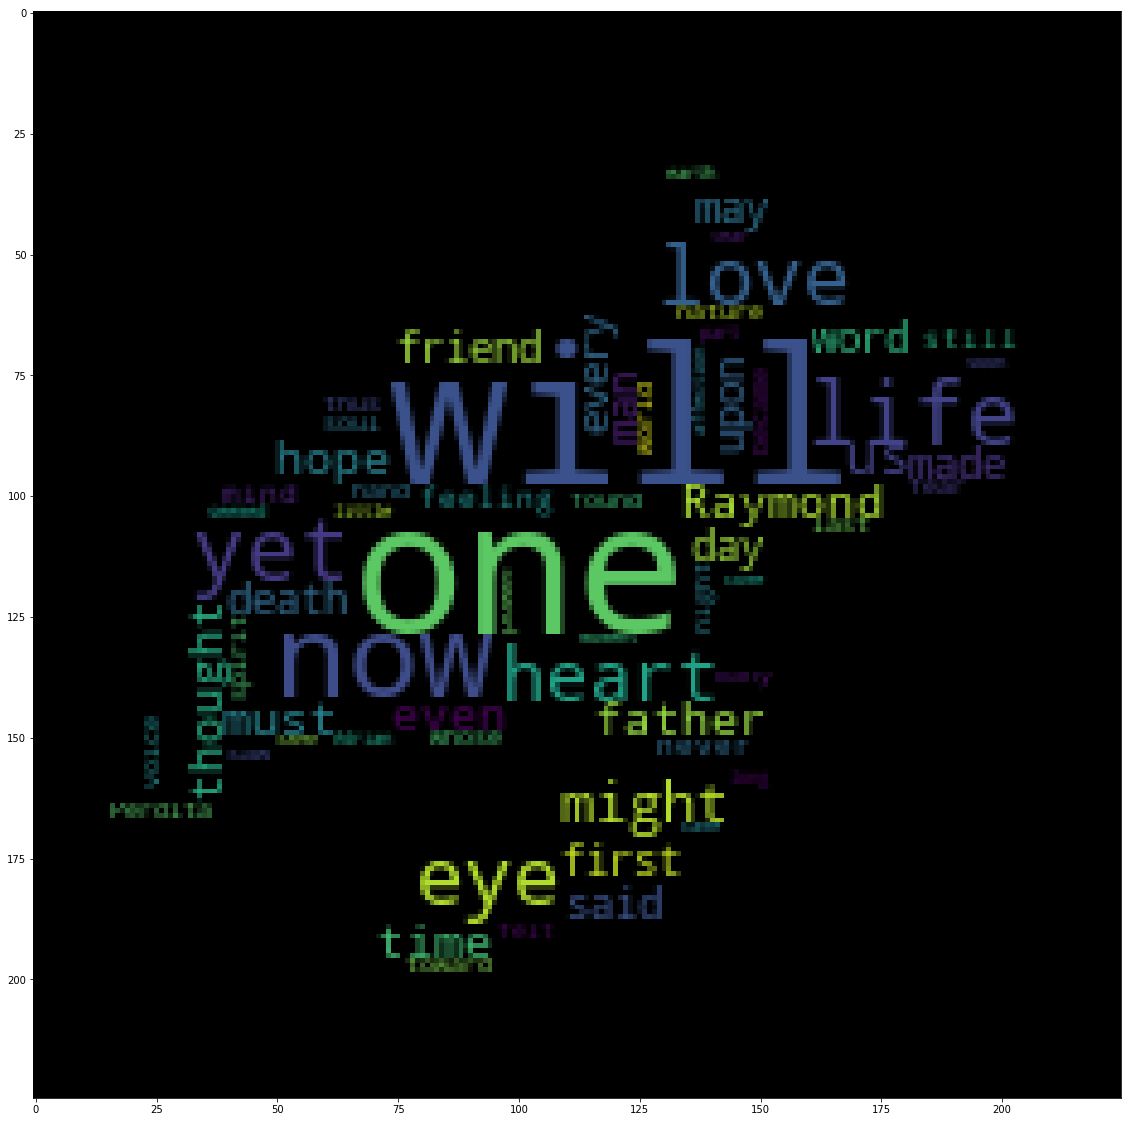

In [41]:
turtle_mask=np.array(Image.open("turtle.jpg"))
wc=WordCloud(max_words=10000,stopwords=STOPWORDS,mask=turtle_mask,max_font_size=40).generate(' '.join(mws))
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.show()

In almost all Natural Language Processing (the field that explores interactions between a computer and human languages) tasks that you will come across (be it topic modelling, or word clustering or document-text classification etc), one will generally always have to undergo these few pre-processing steps to convert the input raw text into a form that is readable by your model and the machine. You certainly can't expect to feed a Random Forest model a paragraph of words and expect it to immediately predict which author that paragraph came from. Behind the scenes, text pre-processing can be boiled down to these few simple steps:

*  **Tokenization**- Segregation of the text into its individual constitutent words.
*  **Stopwords** - Throw away any words that occur too frequently as its frequency of occurrence will not be useful in helping detecting relevant texts. (as an aside also consider throwing away words that occur very infrequently).
*  **Stemming** - combine variants of words into a single parent word that still conveys the same meaning
*  **Vectorization** - Converting text into vector format. One of the simplest is the famous bag-of-words approach, where you create a matrix (for each document or text in the corpus). In the simplest form, this matrix stores word frequencies (word counts) and is oft referred to as vectorization of the raw text.

Natural Language Toolkit (NLTK): To make our Natural Language Processing endeavours more convenient, let me introduce to you one of the most handy toolkits that on NLP - the Natural Language Toolkit, also more commonly referred to as the NLTK module. To import the toolkit, it is as easier as:

In [42]:
import nltk

In [47]:
sentence1=df.text.values[0]
sentence1

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [53]:
text1=nltk.word_tokenize(sentence1)
print(text1)

['This', 'process', ',', 'however', ',', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', ';', 'as', 'I', 'might', 'make', 'its', 'circuit', ',', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out', ',', 'without', 'being', 'aware', 'of', 'the', 'fact', ';', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall', '.']


In [51]:
# Building stopwards corpus

stw=nltk.corpus.stopwords.words('english')
# Print few Stopwords  
print(stw[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [55]:
## removing stopwords 

text2=[w for w in text1 if w not in stw]
print(text2)

['This', 'process', ',', 'however', ',', 'afforded', 'means', 'ascertaining', 'dimensions', 'dungeon', ';', 'I', 'might', 'make', 'circuit', ',', 'return', 'point', 'whence', 'I', 'set', ',', 'without', 'aware', 'fact', ';', 'perfectly', 'uniform', 'seemed', 'wall', '.']


After removal of stopwords, the next stage of NLP that I would like to introduce is the process of Stemming. The work at this stage attempts to reduce as many different variations of similar words into a single term ( different branches all reduced to single word stem). Therefore if we have "running", "runs" and "run", you would really want these three distinct words to collapse into just the word "run". (However of course you lose granularity of the past, present or future tense).

We can turn to NLTK again which provides various stemmers which include variants such as the Porter stemming algorithm, the lancaster stemmer and the Snowball stemmer. In the following example, I will create a porter stemmer instance as follows:

In [58]:
stemmer=nltk.stem.PorterStemmer()


In [59]:
print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))

The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


**Lemmatization to the rescue**

Therefore we turn to another that we could use in lieu of stemming. This method is called lemmatization which aims to achieve the same effect as the former method. However unlike a stemmer, lemmatizing the dataset aims to reduce words based on an actual dictionary or vocabulary (the Lemma) and therefore will not chop off words into stemmed forms that do not carry any lexical meaning. Here we can utilize NLTK once again to initialize a lemmatizer (WordNet variant) and inspect how it collapses words as follows

In [61]:
lemm=nltk.stem.WordNetLemmatizer()
print("The lemmatized form of leaves is: {}".format(lemm.lemmatize("leaves")))

The lemmatized form of leaves is: leaf


#### Combining All steps into one Function

In [67]:
def cleantext(text):
    text=nltk.word_tokenize(text)
    text=[lemm.lemmatize(w.lower()) for w in text if w not in stw]
    return ' '.join(text)
    

In [68]:
df.text=df.text.apply(lambda x:cleantext(x))

In [69]:
df.text.head()

0    this process , however , afforded mean ascerta...
1      it never occurred fumbling might mere mistake .
2    in left hand gold snuff box , , capered hill ,...
3    how lovely spring a looked windsor terrace six...
4    finding nothing else , even gold , superintend...
Name: text, dtype: object

### Vectorization

In [70]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [71]:
cvect=CountVectorizer(max_df=0.9,min_df=10,stop_words='english')

In [72]:
cvect.fit(df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=None, min_df=10,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [73]:
x_matrix=cvect.transform(df.text)

In [75]:
from sklearn.decomposition import LatentDirichletAllocation

In [81]:
lda=LatentDirichletAllocation(n_components=11,learning_method='online',learning_offset=50.,random_state=41)

In [82]:
lda.fit(x_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=11, n_jobs=None,
                          perp_tol=0.1, random_state=41, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [83]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [84]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = cvect.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:thought left hand eye think long air end people voice degree brought better possible manner mind motion make felt took self arm remained subject plan coming resolved met opinion field step ago slight formed raymond picture greek mentioned expected great

Topic #1:world away le thing form make nearly point general appeared true man said countenance wonder known dear fellow died case spirit replied vast hand die peculiar human god little surface regard late condition say instant table read shape plain miserable

Topic #2:time know sound young strange men body heard old told morning knew like great view letter certain came earth hideous held merely memory living week secret half really remember uncle escape cut son shore tone book society act matter ground

Topic #3:hope heart soul felt friend child good look idea adrian sense moment long best despair like affection misery reason idris leave nature imagination feeling tear order sorrow necessary received g

In [87]:
for index,topic in enumerate(lda.components_):
    print(index)
    print(topic)

0
[0.0909133  0.0909117  0.09091049 ... 0.0909124  0.09091146 0.09091246]
1
[0.0909121  0.09091815 0.09091245 ... 0.09091289 0.09091301 0.09091496]
2
[ 0.0909158  26.10748834  0.0909181  ...  0.09091631  0.09091339
  0.09092206]
3
[0.09091333 0.09091514 0.09091115 ... 0.09091104 0.09091256 0.09092203]
4
[ 0.09091189  0.09091596 24.9440297  ...  0.09091154  0.09091092
  0.09091701]
5
[ 0.09091468  0.0909198   0.09091258 ...  0.09091207 15.3474751
  0.09092705]
6
[0.09091572 0.09091436 0.09091276 ... 0.09091207 0.09091155 0.09091902]
7
[11.82943908  0.09092096  0.09090999 ...  0.09091221  0.09091104
 17.88870007]
8
[ 0.09091572  0.0909202   0.09095173 ... 15.94187535  0.09091009
  0.09091336]
9
[0.09091605 0.09091647 0.09091703 ... 0.09091661 0.09091192 0.09091715]
10
[0.09091203 0.09092257 0.09091144 ... 0.09091236 0.09091625 0.09091639]


In [89]:
f1=cvect.get_feature_names()

In [91]:

from gensim import corpora, models

D:\anaconda\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
D:\anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [94]:
df.text.head()


0    this process , however , afforded mean ascerta...
1      it never occurred fumbling might mere mistake .
2    in left hand gold snuff box , , capered hill ,...
3    how lovely spring a looked windsor terrace six...
4    finding nothing else , even gold , superintend...
Name: text, dtype: object

In [95]:
data=df.text.values.tolist()

In [98]:
tokenized_data=[w.split(' ') for w in data]

In [99]:
dictionary = corpora.Dictionary(tokenized_data)

In [102]:
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

# View
print(corpus[:1])

[[(0, 4), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]]


In [106]:
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)



In [110]:
from pprint import pprint

In [111]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.045*"saw" + 0.041*"in" + 0.023*"felt" + 0.015*"wind" + 0.013*"perdita" + '
  '0.013*"sun" + 0.012*"mountain" + 0.012*"behind" + 0.011*"several" + '
  '0.011*"misery"'),
 (1,
  '0.022*"mind" + 0.018*"point" + 0.018*"let" + 0.015*"true" + 0.013*"feeling" '
  '+ 0.012*"perhaps" + 0.012*"towards" + 0.011*"suddenly" + 0.011*"attention" '
  '+ 0.010*"lip"'),
 (2,
  '0.296*"``" + 0.058*"?" + 0.035*"may" + 0.025*"much" + 0.017*"you" + '
  '0.015*"oh" + 0.013*"alone" + 0.013*"what" + 0.010*"no" + 0.010*"dear"'),
 (3,
  '0.027*"ever" + 0.027*"come" + 0.025*"death" + 0.019*"light" + 0.018*"back" '
  '+ 0.018*"good" + 0.017*"part" + 0.016*"form" + 0.015*"looked" + '
  '0.014*"course"'),
 (4,
  '0.047*"u" + 0.037*"word" + 0.037*"we" + 0.030*"well" + 0.023*"indeed" + '
  '0.022*"mean" + 0.016*"book" + 0.015*"moon" + 0.013*"others" + '
  '0.012*"period"'),
 (5,
  '0.028*"length" + 0.024*"door" + 0.024*"for" + 0.024*"thousand" + '
  '0.023*"sea" + 0.021*"full" + 0.019*"room" + 0.015*"secret"

In [114]:

import pyLDAvis
import pyLDAvis.gensim  
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

D:\anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.490552 -0.037909       1        1  33.684109
17    -0.019072  0.422977       2        1   5.567644
3      0.005720 -0.006820       3        1   4.393203
2     -0.010115 -0.047396       4        1   4.057289
8      0.018519 -0.016323       5        1   3.823680
11     0.021353 -0.018215       6        1   3.782176
12     0.020957 -0.013489       7        1   3.652872
1      0.027499 -0.022260       8        1   3.565705
7      0.026828 -0.013351       9        1   3.516459
0      0.028868 -0.018712      10        1   3.484458
9      0.027995 -0.020431      11        1   3.388882
18     0.029927 -0.022994      12        1   3.388081
4      0.035362 -0.022927      13        1   3.204240
19     0.034299 -0.024200      14        1   3.195114
14     0.040298 -0.021980      15        1   3.036355
13     0.037609 -0.021739      16        1   3.032926
5      0.035860 -0.022240      17        1   3.012377
6      0.043319 -0.021226      18        1   2.896446
16     0.042993 -0.022255      19        1   2.841486
15     0.042333 -0.028511      20        1   2.476516, topic_info=      Category          Freq       Term         Total  loglift  logprob
0      Default  37772.000000          ,  37772.000000  30.0000  30.0000
1      Default  19252.000000          .  19252.000000  29.0000  29.0000
191    Default   4239.000000         ``   4239.000000  28.0000  28.0000
11     Default  10613.000000          i  10613.000000  27.0000  27.0000
2      Default   5202.000000          ;   5202.000000  26.0000  26.0000
467    Default   1333.000000       upon   1333.000000  25.0000  25.0000
305    Default   1129.000000         's   1129.000000  24.0000  24.0000
27     Default   1054.000000         it   1054.000000  23.0000  23.0000
140    Default    817.000000          '    817.000000  22.0000  22.0000
300    Default    798.000000       time    798.000000  21.0000  21.0000
197    Default    832.000000         he    832.000000  20.0000  20.0000
367    Default    838.000000          ?    838.000000  19.0000  19.0000
222    Default    760.000000        but    760.000000  18.0000  18.0000
193    Default    689.000000        day    689.000000  17.0000  17.0000
208    Default    623.000000       life    623.000000  16.0000  16.0000
135    Default   2056.000000        the   2056.000000  15.0000  15.0000
725    Default    649.000000      thing    649.000000  14.0000  14.0000
179    Default    618.000000        yet    618.000000  13.0000  13.0000
495    Default    622.000000        old    622.000000  12.0000  12.0000
219    Default    587.000000       like    587.000000  11.0000  11.0000
444    Default    551.000000       made    551.000000  10.0000  10.0000
51     Default    556.000000          a    556.000000   9.0000   9.0000
1234   Default    555.000000        saw    555.000000   8.0000   8.0000
455    Default    537.000000          u    537.000000   7.0000   7.0000
1330   Default    535.000000      night    535.000000   6.0000   6.0000
359    Default    519.000000      every    519.000000   5.0000   5.0000
41     Default    511.000000         in    511.000000   4.0000   4.0000
296    Default   1600.000000        one   1600.000000   3.0000   3.0000
155    Default    493.000000      great    493.000000   2.0000   2.0000
656    Default    452.000000      still    452.000000   1.0000   1.0000
...        ...           ...        ...           ...      ...      ...
140    Topic20    816.329773          '    817.213684   3.6972  -2.3713
654    Topic20    267.598419       seen    268.482361   3.6950  -3.4866
657    Topic20    180.645813       tree    181.529755   3.6934  -3.8796
2868   Topic20    163.867798       read    164.751740   3.6929  -3.9770
943    Topic20    141.475082    morning    142.359024   3.6921  -4.1240
1333   Topic20    140.272186       then    141.156128   3.6920  -4.1325
309    Topic20    137.160522     

In [123]:
new_doc = 'Practical Bayesian Optimization of Machine Learning Algorithms'
new_doc=cleantext(new_doc)
new_doc = dictionary.doc2bow(new_doc.split(' '))

print(new_doc)
pprint(lda_model.get_document_topics(new_doc))



[(1007, 1), (7787, 1), (8892, 1)]
[(0, 0.03308575),
 (1, 0.049037453),
 (2, 0.037568364),
 (3, 0.041781258),
 (4, 0.030632492),
 (5, 0.02855311),
 (6, 0.027905677),
 (7, 0.033417538),
 (8, 0.03685044),
 (9, 0.032887105),
 (10, 0.32373643),
 (11, 0.036120288),
 (12, 0.04996039),
 (13, 0.02920524),
 (14, 0.02902596),
 (15, 0.02236437),
 (16, 0.027039304),
 (17, 0.053096768),
 (18, 0.03257131),
 (19, 0.045160722)]


In [131]:
tm=lda_model.get_document_topics(new_doc)
v1=[k[1] for k in tm]
v1

[0.03308575,
 0.049037453,
 0.037568364,
 0.041781258,
 0.030632492,
 0.02855311,
 0.027905677,
 0.033417538,
 0.03685044,
 0.032887105,
 0.32373643,
 0.036120288,
 0.04996039,
 0.02920524,
 0.02902596,
 0.02236437,
 0.027039304,
 0.053096768,
 0.03257131,
 0.045160722]

In [132]:
## Creating function to return feature vector which representes distribution of topics in documents 

def getvect(new_doc):
    new_doc=cleantext(new_doc)
    new_doc = dictionary.doc2bow(new_doc.split(' '))
    tm=lda_model.get_document_topics(new_doc)
    v1=[k[1] for k in tm]
    return v1

In [135]:
getvect("Practical Bayesian Optimization of Machine Learning Algorithms")

[0.03308575,
 0.049037453,
 0.037568364,
 0.041781258,
 0.030632492,
 0.02855311,
 0.027905677,
 0.033417538,
 0.03685044,
 0.032887105,
 0.32373643,
 0.036120288,
 0.04996039,
 0.02920524,
 0.02902596,
 0.02236437,
 0.027039304,
 0.053096768,
 0.03257131,
 0.045160722]

In [155]:
X_feature_vect=df.text.apply(getvect)

X_feature_vect[:10]

0    [0.024035504, 0.035623793, 0.02729195, 0.03035...
1    [0.031205734, 0.032045387, 0.035433635, 0.0394...
2    [0.025535062, 0.026205221, 0.028906923, 0.0321...
3    [0.025409553, 0.026069663, 0.02872874, 0.05510...
4    [0.026341217, 0.02704998, 0.02991005, 0.033264...
5    [0.031526215, 0.022078453, 0.024178216, 0.0367...
6    [0.039750796, 0.14001001, 0.031026607, 0.03450...
7    [0.032796398, 0.048643727, 0.037090123, 0.0412...
8    [0.04866116, 0.02109846, 0.03208296, 0.0347126...
9    [0.028383313, 0.029147023, 0.03222882, 0.04876...
Name: text, dtype: object

In [178]:
X_t=X_feature_vect.values

In [181]:
X_t=[]

for k in X_feature_vect:
    X_t.append(k)
X_t[:1]

[[0.024035504,
  0.035623793,
  0.02729195,
  0.030352453,
  0.033194873,
  0.020742718,
  0.020272383,
  0.0352181,
  0.03771197,
  0.023891198,
  0.47589627,
  0.037181545,
  0.036294274,
  0.021216467,
  0.021086227,
  0.016246842,
  0.019643,
  0.03857273,
  0.023661783,
  0.021865936]]

In [233]:
X=np.array([np.pad(np.array(k),(20-len(k),0),mode='constant') for k in X_t ])


In [234]:
X.shape

(19579, 20)

In [235]:
y=df.author.values

In [236]:
y.shape

(19579,)

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Converting Topics to Feature Vectors
Now comes the interesting bit. We’re going to use the LDA model to grab the distribution of these 20 topics for every review. This 20-vector will be our feature vector for supervised classification, with the supervised learning goal being to determine positive or negative sentiment.

In [239]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [240]:
y_pred=lr.predict(X_test)

In [244]:
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [242]:
print(accuracy_score(y_pred,y_test))

0.5010214504596527


In [245]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         EAP       0.88      0.47      0.61      2977
         HPL       0.42      0.61      0.50       749
         MWS       0.08      0.55      0.15       190

    accuracy                           0.50      3916
   macro avg       0.46      0.54      0.42      3916
weighted avg       0.75      0.50      0.57      3916

